### Aim:
In this notebook, I will evaluate the ability of PCA to reduce dimensions from a personal dataset of interest. This dataset contains results from various "in vitro" tests thereof performed within the TOXCAST program (EPA) on 175 drugs. Data is present in two formats:
1. Binary data format: Test results are expressed in a numeric format for perturbed (1) or not perturbed (0) 
2. Continuous data format: Test results for perturbed targets are expressed in terms of their raw "NAS" score (NAS <=-4, as only targets with medium or higher NAS are included in this data). All other targets are deemed as not being perturbed and assigned a dummy value of -1000

In [14]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
#magic command to print all output instead of only last line
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

Import data formatted in "binary" vs "continuous" format

In [ ]:
#read-in dili test targets with their NAS scores in binary or continuous format 
#use data in continuous format for PCA-based variable reduction

dtb=pd.read_csv("dili_targets_binary.csv")

dtc=pd.read_csv("dili_targets_continuous.csv")

#confirm order of indexes and columns and order within chnm column is identical across both dtb and dtc
dtb.head() 
dtc.head()

dtb.index.equals(dtc.index), dtb.columns.equals(dtc.columns), dtb.chnm.equals(dtc.chnm)

dtb.info()

Conclusion from above: Both continuous and binary formatted data are similar in terms of columns, indices and entries within at least one of the tested columns ("chnm"). As preparation for PCA, in next step, drop column that contains drug name ("chnm"). 

Retain one copy of this column as a variable - prior to drop operation - for use later (to append to data post-PCA).

In [17]:
#Drop column containing drug name ("chnm") and check for correlation across all variables 

dtc_dchn=dtc["chnm"] #save column name for use later (to append to data post-PCA)

dtc.drop("chnm", axis=1, inplace = True)

dtb.drop("chnm", axis=1, inplace = True)

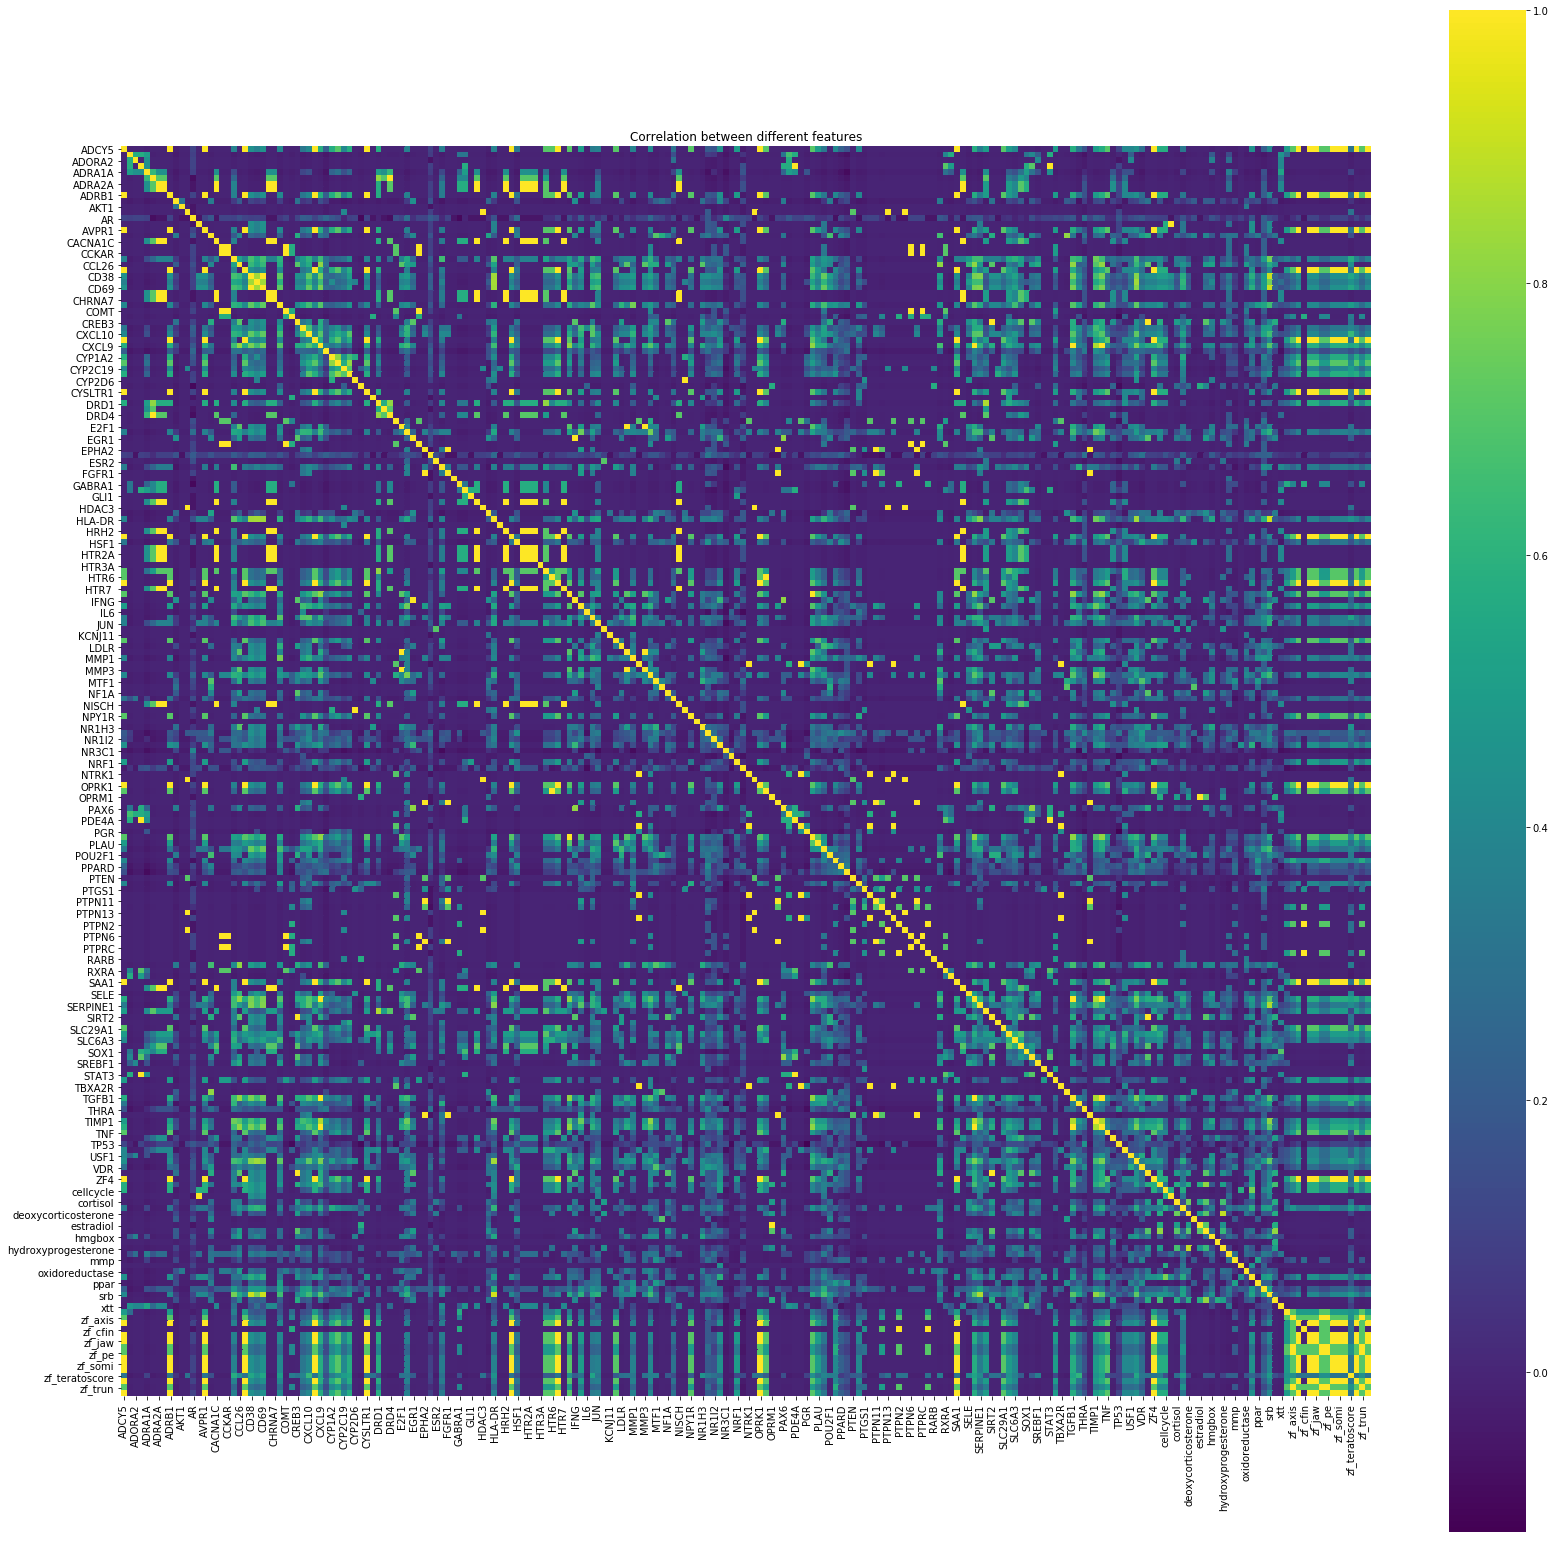

In [19]:
correlation = dtc.corr()
plt.figure(figsize=(28,28))
sns.heatmap(correlation, square=True,cmap='viridis')
plt.title('Correlation between different features')
plt.show();

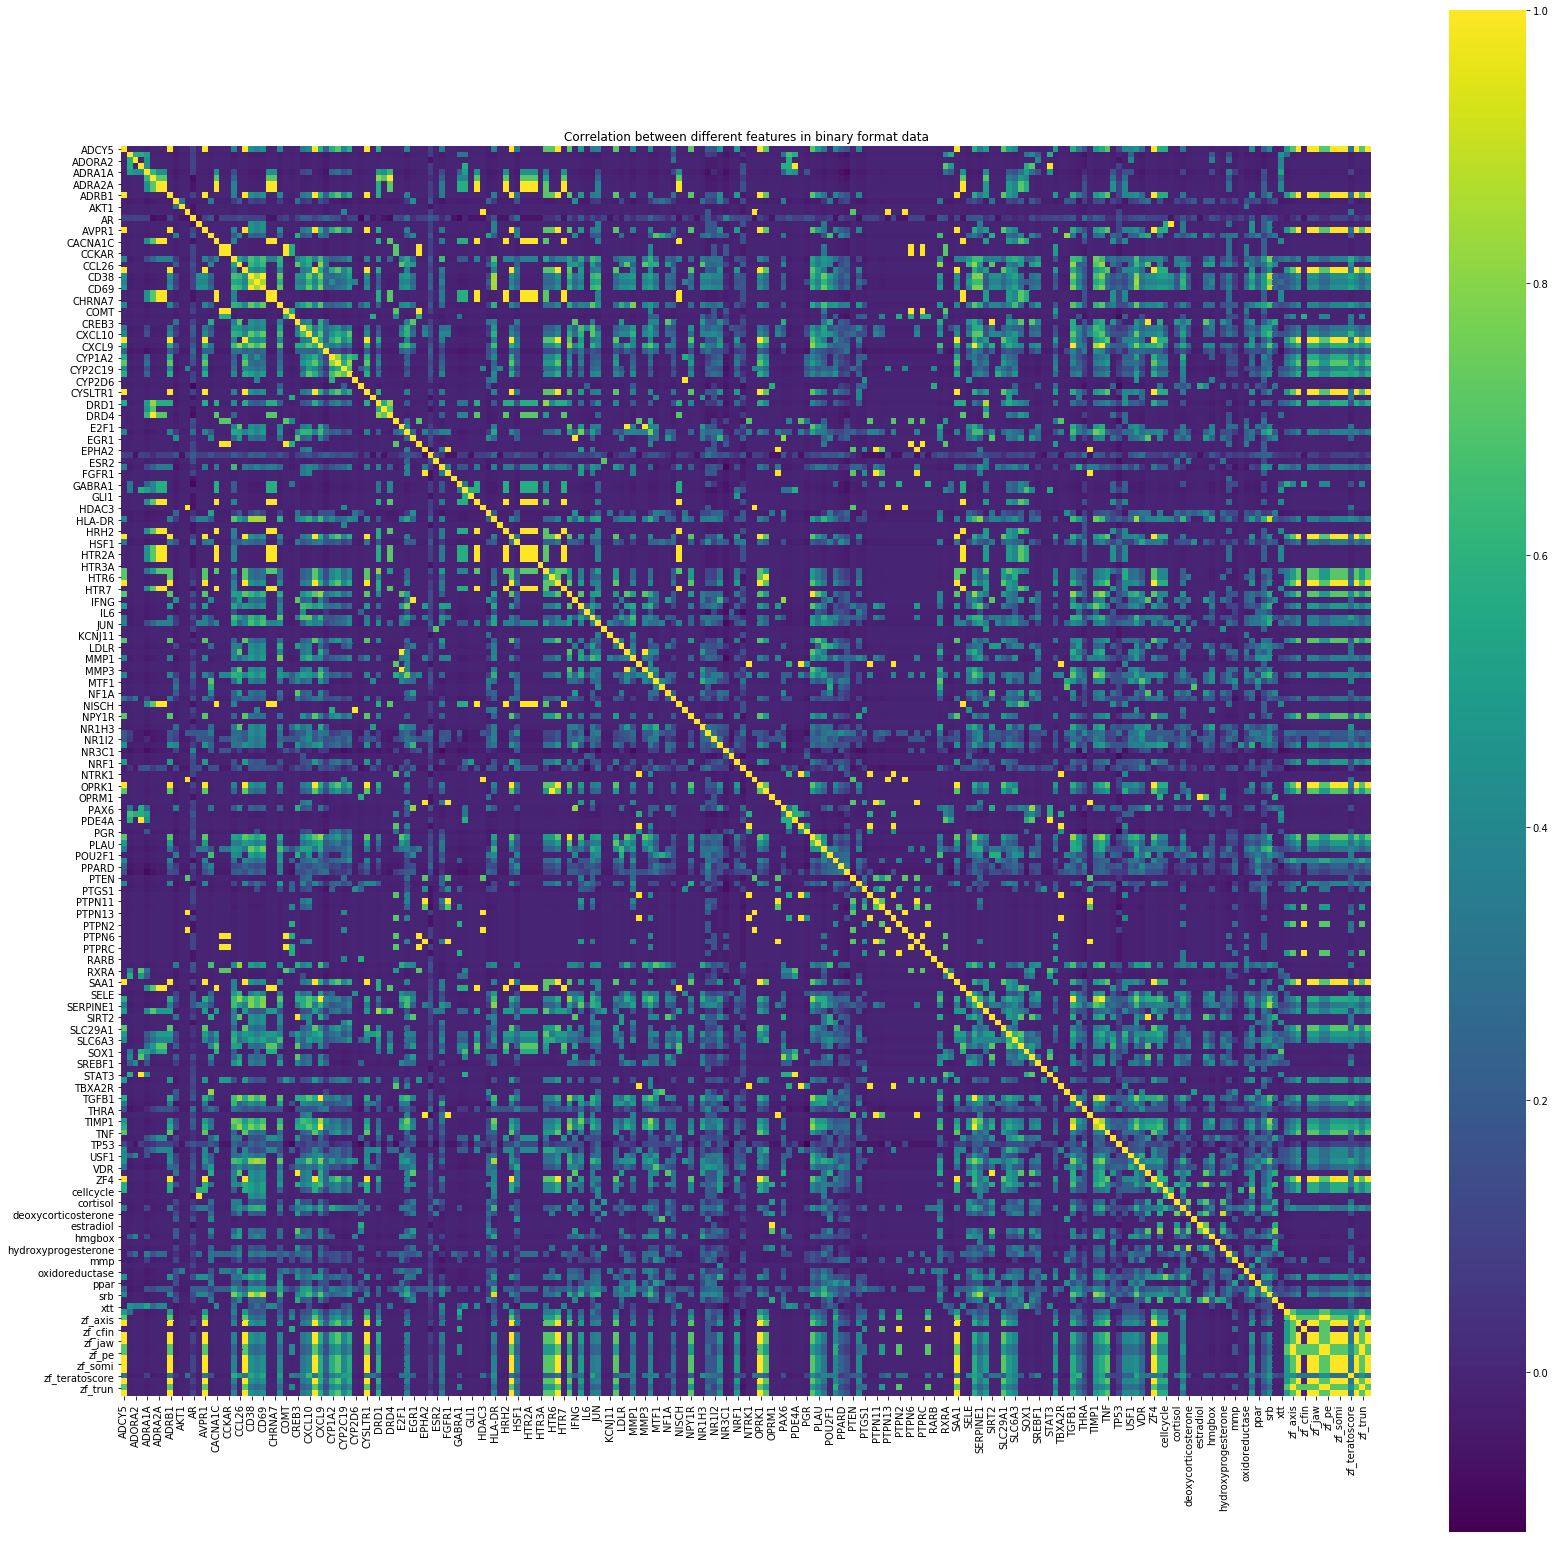

In [20]:
correlation_bin = dtb.corr()
plt.figure(figsize=(28,28))
sns.heatmap(correlation_bin, square=True,cmap='viridis')
plt.title('Correlation between different features in binary format data')
plt.show();

Conclusion from above: Both binary and continuous format data look similar based on correlation map - based on a quick eyeball analysis.

In [35]:
# Scale "continuous" and "binary" data

from sklearn.preprocessing import StandardScaler

scaler=StandardScaler() #instantiate StandardScaler class

dtc_scaled_ar= scaler.fit_transform(dtc) #fit-transform instantiated class and save to an numpy array
dtc_scaled=pd.DataFrame(dtc_scaled_ar, columns=dtc.columns) #saved "scaled" data to a dataframe
dtc_scaled.head()

dtb_scaled_ar=scaler.fit_transform(dtb) #fit-transform instantiated class and save to an numpy array
dtb_scaled=pd.DataFrame(dtb_scaled_ar, columns=dtb.columns)#saved "scaled" data to a dataframe
dtb_scaled.head()

dtc_scaled.equals(dtb_scaled)


,ADCY5,ADORA1,ADORA2,ADORA2A,ADRA1A,ADRA1B,ADRA2A,ADRA2B,ADRB1,AHR,...,zf_jaw,zf_nc,zf_pe,zf_snou,zf_somi,zf_swim,zf_teratoscore,zf_tr,zf_trun,zf_yse
0,-0.07581,-0.132068,-0.07581,-0.07581,-0.171499,-0.107521,-0.07581,-0.07581,-0.07581,4.064416,...,-0.07581,-0.107521,-0.107521,-0.07581,-0.07581,-0.07581,-0.246183,-0.07581,-0.107521,-0.07581
1,-0.07581,-0.132068,-0.07581,-0.07581,-0.171499,-0.107521,-0.07581,-0.07581,-0.07581,-0.246183,...,-0.07581,-0.107521,-0.107521,-0.07581,-0.07581,-0.07581,-0.246183,-0.07581,-0.107521,-0.07581
2,-0.07581,-0.132068,-0.07581,-0.07581,-0.171499,-0.107521,-0.07581,-0.07581,-0.07581,-0.246183,...,-0.07581,-0.107521,-0.107521,-0.07581,-0.07581,-0.07581,-0.246183,-0.07581,-0.107521,-0.07581
3,-0.07581,-0.132068,-0.07581,-0.07581,-0.171499,-0.107521,-0.07581,-0.07581,-0.07581,4.056358,...,-0.07581,-0.107521,-0.107521,-0.07581,-0.07581,-0.07581,-0.246183,-0.07581,-0.107521,-0.07581
4,-0.07581,-0.132068,-0.07581,-0.07581,-0.171499,-0.107521,-0.07581,-0.07581,-0.07581,-0.246183,...,-0.07581,-0.107521,-0.107521,-0.07581,-0.07581,-0.07581,-0.246183,-0.07581,-0.107521,-0.07581


,ADCY5,ADORA1,ADORA2,ADORA2A,ADRA1A,ADRA1B,ADRA2A,ADRA2B,ADRB1,AHR,...,zf_jaw,zf_nc,zf_pe,zf_snou,zf_somi,zf_swim,zf_teratoscore,zf_tr,zf_trun,zf_yse
0,-0.07581,-0.132068,-0.07581,-0.07581,-0.171499,-0.107521,-0.07581,-0.07581,-0.07581,4.062019,...,-0.07581,-0.107521,-0.107521,-0.07581,-0.07581,-0.07581,-0.246183,-0.07581,-0.107521,-0.07581
1,-0.07581,-0.132068,-0.07581,-0.07581,-0.171499,-0.107521,-0.07581,-0.07581,-0.07581,-0.246183,...,-0.07581,-0.107521,-0.107521,-0.07581,-0.07581,-0.07581,-0.246183,-0.07581,-0.107521,-0.07581
2,-0.07581,-0.132068,-0.07581,-0.07581,-0.171499,-0.107521,-0.07581,-0.07581,-0.07581,-0.246183,...,-0.07581,-0.107521,-0.107521,-0.07581,-0.07581,-0.07581,-0.246183,-0.07581,-0.107521,-0.07581
3,-0.07581,-0.132068,-0.07581,-0.07581,-0.171499,-0.107521,-0.07581,-0.07581,-0.07581,4.062019,...,-0.07581,-0.107521,-0.107521,-0.07581,-0.07581,-0.07581,-0.246183,-0.07581,-0.107521,-0.07581
4,-0.07581,-0.132068,-0.07581,-0.07581,-0.171499,-0.107521,-0.07581,-0.07581,-0.07581,-0.246183,...,-0.07581,-0.107521,-0.107521,-0.07581,-0.07581,-0.07581,-0.246183,-0.07581,-0.107521,-0.07581


False

Conclusion from above - Although both dataframes containing continuous vs binary data are "similar", they are not identical to each other.

In [36]:
# Fit PCA on scaled "continuous" data

from sklearn.decomposition import PCA
pca_cont = PCA().fit(dtc_scaled) #
pca_cont

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

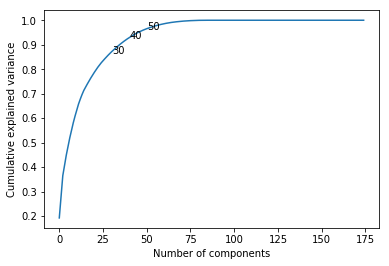

In [25]:
#Evaluate explained variance with increasing # of principal components

pca_cont.explained_variance_ratio_[:30].sum() # first 30 principal components account for >86% of variance in data
pca_cont.explained_variance_ratio_[:40].sum() # first 40 principal components account for >92% of variance in data
pca_cont.explained_variance_ratio_[:50].sum() # first 50 principal components account for >96% of variance in data

# Plot relation between components and variance

plt.plot(np.cumsum(pca_cont.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.annotate('30',xy=(30, .865))
plt.annotate('40',xy=(40, .924))
plt.annotate('50',xy=(50, .962))
plt.show();

In [27]:
## fit PCA to binary data

pca_bin = PCA().fit(dtb_scaled) #
pca_bin

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

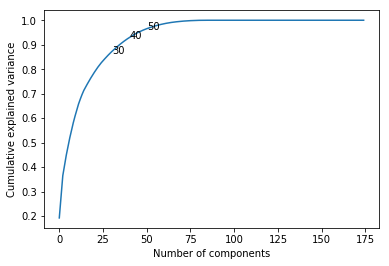

In [38]:
#Evaluate explained variance with increasing # of principal components generated from binary data

pca_bin.explained_variance_ratio_[:30].sum() # first 30 principal components account for >86% of variance in data
pca_bin.explained_variance_ratio_[:40].sum() # first 40 principal components account for >92% of variance in data
pca_bin.explained_variance_ratio_[:50].sum() # first 50 principal components account for >96% of variance in data

# Plot relation between components and variance

plt.plot(np.cumsum(pca_bin.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.annotate('30',xy=(30, .865))
plt.annotate('40',xy=(40, .924))
plt.annotate('50',xy=(50, .962))
plt.show();

#### Conclusion - PCA works equally effectively to reduce dimensions using test data of interest in "binary" or "continuous" format. I will save the results from "continuous" formatted data for subsequent incorporation with other predictors of interest for modeling project